In [10]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck13
from astropy.io import fits
from astropy.table import Table
import json
import disperse

In [2]:
cosmo = Planck13
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [3]:
coma_DR12 = pd.read_csv('coma_DR12_filtered_RaDecZ.csv')
sdss_opt_gr_full = pd.read_csv('sdss_opt_gr_filtered_RaDecZ.csv')

In [4]:
coma_DR12

,RA,DEC,Z
0,247.159333,39.551266,0.031252
1,246.358714,39.870696,0.029112
2,246.920352,39.383022,0.029601
3,246.842087,39.109641,0.033110
4,246.765044,39.527357,0.033841
...,...,...,...
57194,172.000815,25.069872,0.005537
57195,142.900640,27.296280,0.005956
57196,178.705527,6.709595,0.005738
57197,161.946250,46.879323,0.005694


In [5]:
sdss_opt_gr_full

,n_gal,RA,DEC,Z,r_max,M200,R200
0,180,246.942018,39.401823,0.031119,1.720684,635.844000,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,221.207000,1.262930
2,2,247.824366,38.917924,0.030759,0.096705,2.834670,0.295365
3,101,246.935701,40.923333,0.031285,1.363890,307.137000,1.407870
4,85,247.491124,40.610586,0.029515,1.029668,147.288000,1.102600
...,...,...,...,...,...,...,...
8966,2,181.346931,-0.381930,0.005711,0.044085,0.026836,0.062977
8967,2,173.219714,47.454230,0.005541,0.018403,0.038332,0.070928
8968,3,240.377226,6.865963,0.005642,0.170228,4.155390,0.338184
8969,2,229.987528,46.195284,0.006590,0.115962,0.096087,0.096318


In [6]:
min_n_gals = 15
sdss_opt_gr = sdss_opt_gr_full[sdss_opt_gr_full['n_gal'] >= min_n_gals]
sdss_opt_gr.reset_index(drop=True, inplace=True)
sdss_opt_gr['R'] = sdss_opt_gr['R200']
sdss_opt_gr

<ipython-input-6-d1547facb633>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdss_opt_gr['R'] = sdss_opt_gr['R200']


,n_gal,RA,DEC,Z,r_max,M200,R200,R
0,180,246.942018,39.401823,0.031119,1.720684,635.8440,1.794430,1.794430
1,83,247.581739,39.778534,0.028910,1.040201,221.2070,1.262930,1.262930
2,101,246.935701,40.923333,0.031285,1.363890,307.1370,1.407870,1.407870
3,85,247.491124,40.610586,0.029515,1.029668,147.2880,1.102600,1.102600
4,34,246.010700,41.010818,0.030111,1.035922,135.6380,1.072530,1.072530
...,...,...,...,...,...,...,...,...
217,22,247.144612,8.529292,0.032348,0.760295,54.8312,0.792467,0.792467
218,22,179.565240,25.119524,0.015661,0.424296,18.0177,0.549744,0.549744
219,32,211.719008,55.039101,0.006525,0.544485,19.9125,0.569996,0.569996
220,15,165.703588,50.720856,0.022642,0.463985,12.5296,0.485982,0.485982


In [7]:
DPS = disperse.Disperse3D(
    coma_DR12, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    clusters=sdss_opt_gr
)

In [8]:
DPS.count_cart_coords()

In [9]:
metrics = DPS.count_metrics_several_params(
    sigmas=[3.0, 4.0, 5.0, 6.0, 7.0],
    smooths=[0, 1, 2],
    mode='mpc',
    rads=list(range(1, 16))
)

>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts
>>> read_skl_ascii_RaDecZ starts


  0%|          | 0/15 [00:00<?, ?it/s]

>>> Generate random clusters


100%|██████████| 5/5 [00:15<00:00,  3.14s/it]


>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts


  0%|          | 0/15 [00:00<?, ?it/s]

>>> read_skl_ascii_RaDecZ starts


100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts
>>> read_skl_ascii_RaDecZ starts


100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts


  0%|          | 0/15 [00:00<?, ?it/s]

>>> read_skl_ascii_RaDecZ starts


100%|██████████| 5/5 [00:13<00:00,  2.65s/it]


>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts


  0%|          | 0/15 [00:00<?, ?it/s]

>>> read_skl_ascii_RaDecZ starts


100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


>>> delaunay_3D starts
>>> mse starts


  0%|          | 0/15 [00:00<?, ?it/s]

>>> skelconv starts
>>> read_skl_ascii_RaDecZ starts


100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


>>> delaunay_3D starts
>>> mse starts
>>> skelconv starts
>>> read_skl_ascii_RaDecZ starts


FileNotFoundError: [Errno 2] No such file or directory: '140571576583936_galaxies_ascii.txt.NDnet_s5.up.NDskl.BRK.RaDecZ.ASMB.a.NDskl'

In [ ]:
with open('metrics.json', 'w') as f:
    json.dump(metrics, f)

In [11]:
with open('metrics.json', 'r') as f:
    metrics_load = json.load(f)

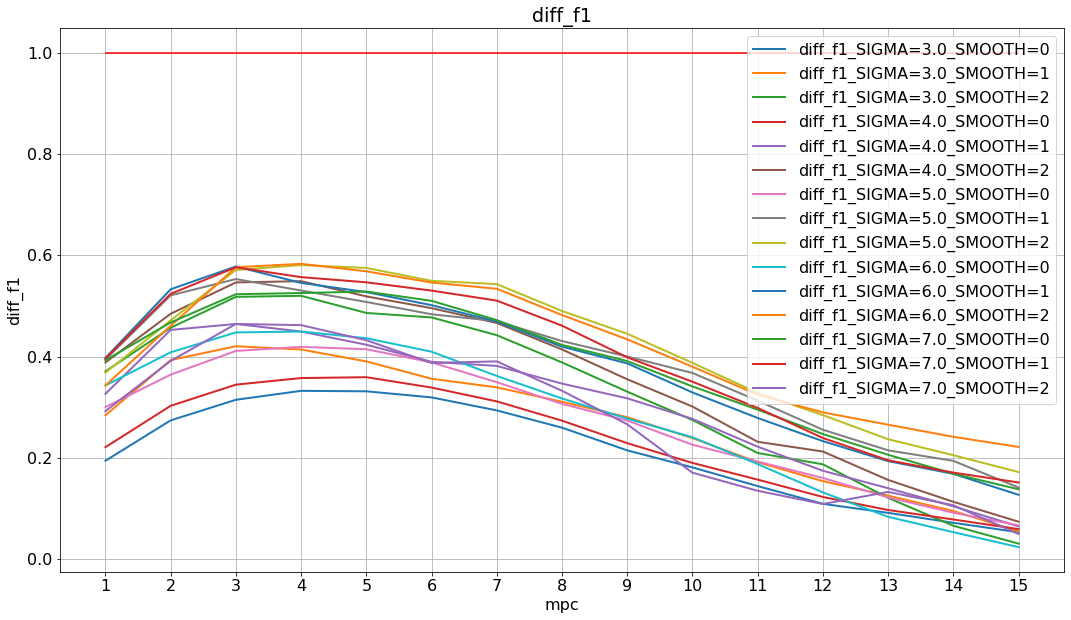

In [12]:
disperse.Disperse3D.metrics_visual('diff_f1', metrics_load)

In [13]:
metrics_load

{'sigmas': [3.0, 4.0, 5.0, 6.0, 7.0],
 'smooths': [0, 1, 2],
 'mode': 'mpc',
 'rads': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 '3.0': {'0': {'sigma': 3,
   'smooth': 0,
   'angle': 30,
   'mode': 'mpc',
   'rads': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
   'cl_num': 222,
   'fils_num': 2523,
   'true_cl_inter': [168,
    201,
    214,
    219,
    220,
    221,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222,
    222],
   'false_cl_inter': [3.4,
    16.6,
    36.4,
    55.6,
    78.6,
    105.8,
    130.4,
    151.6,
    170.8,
    181.4,
    192.2,
    201.8,
    205.6,
    209.4,
    212.4],
   'diff_cl_inter': [164.6,
    184.4,
    177.6,
    163.4,
    141.4,
    115.2,
    91.6,
    70.4,
    51.19999999999999,
    40.599999999999994,
    29.80000000000001,
    20.19999999999999,
    16.400000000000006,
    12.599999999999994,
    9.599999999999994],
   'true_cl_conns': [315,
    534,
    729,
    950,
    1200,
    1493,
    1799,

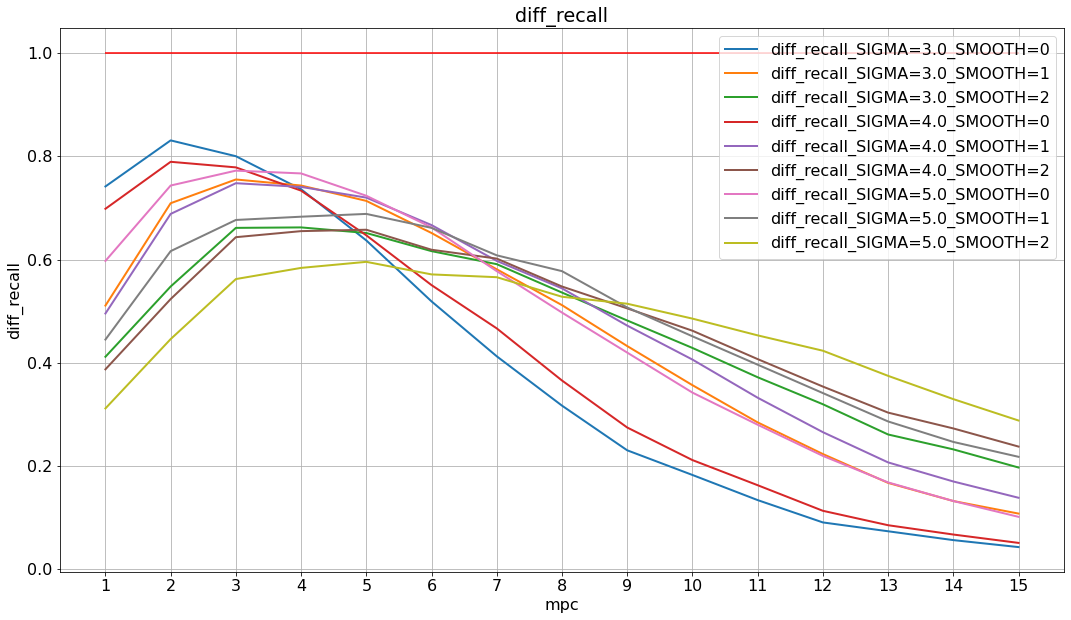

In [14]:
metrics_01 = metrics_load.copy()
metrics_01['sigmas'] = [3.0, 4.0, 5.0]
disperse.Disperse3D.metrics_visual('diff_recall', metrics_01)

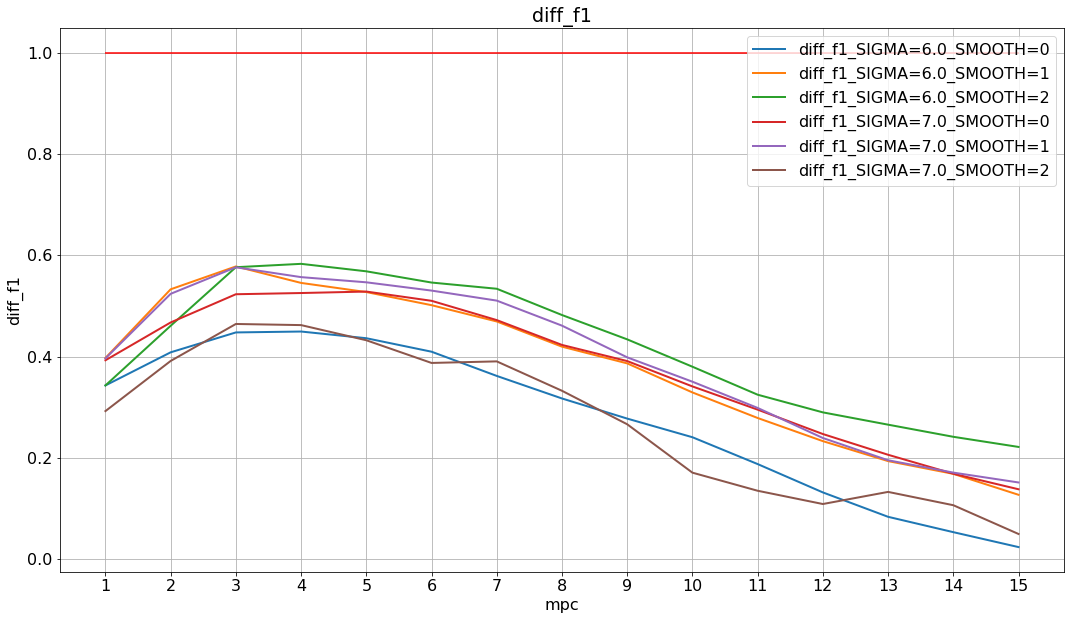

In [15]:
metrics_02 = metrics_load.copy()
metrics_02['sigmas'] = [6.0, 7.0]
disperse.Disperse3D.metrics_visual('diff_f1', metrics_02)

In [16]:
SIGMA_ = '7.0'
SMOOTH_ = '2'
print(metrics_load[SIGMA_][SMOOTH_]['true_recall'][3])
print(metrics_load[SIGMA_][SMOOTH_]['true_precision'][3])
print(metrics_load[SIGMA_][SMOOTH_]['true_f1'][3])

0.40540540540540543
0.7727272727272727
0.5318039624608968


In [17]:
galaxies = pd.read_csv('SDSS/SDSS_DR16.csv')
galaxies = galaxies[galaxies['class'] == 'GALAXY']
galaxies

,ra,dec,z,zErr,class,subClass
0,146.71421,-1.041304,0.021275,0.000009,GALAXY,NaN
1,146.71421,-1.041304,0.021222,0.000009,GALAXY,STARFORMING
2,146.91945,-0.990492,0.213925,0.000052,GALAXY,NaN
3,146.74413,-0.652191,0.203783,0.000039,GALAXY,NaN
6,146.85983,-0.808902,0.126554,0.000062,GALAXY,NaN
...,...,...,...,...,...,...
5789190,146.13969,26.500868,0.903536,0.000424,GALAXY,NaN
5789192,146.20911,26.557960,0.628224,0.000202,GALAXY,NaN
5789194,146.09398,26.524402,0.845268,0.000511,GALAXY,NaN
5789197,146.32252,26.549261,0.058894,0.000007,GALAXY,STARBURST
